In [4]:
import pandas as pd
df = pd.read_csv('synthetic_bank_transactions.csv', delimiter=';', encoding='utf-8')
df

,Transaction_ID,Customer_ID,Transaction_Date,Amount,Fraud_Flag
0,1,1102,2023-01-01 00:00:00,40332.711015,0
1,2,1435,2023-01-01 00:01:00,53078.446973,0
2,3,1860,2023-01-01 00:02:00,33993.352318,0
3,4,1270,2023-01-01 00:03:00,19173.357170,0
4,5,1106,2023-01-01 00:04:00,83856.278080,0
...,...,...,...,...,...
9995,9996,1914,2023-01-07 22:35:00,93815.121546,0
9996,9997,1209,2023-01-07 22:36:00,52360.974444,0
9997,9998,1740,2023-01-07 22:37:00,184324.239852,1
9998,9999,1861,2023-01-07 22:38:00,83587.576923,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    10000 non-null  int64  
 1   Customer_ID       10000 non-null  int64  
 2   Transaction_Date  10000 non-null  object 
 3   Amount            10000 non-null  float64
 4   Fraud_Flag        10000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB
None


In [8]:
print(df.describe())

       Transaction_ID   Customer_ID         Amount    Fraud_Flag
count     10000.00000  10000.000000   10000.000000  10000.000000
mean       5000.50000   1503.470600  100078.122930      0.502500
std        2886.89568    289.724434   57641.246610      0.500019
min           1.00000   1000.000000      73.723050      0.000000
25%        2500.75000   1250.000000   51041.427182      0.000000
50%        5000.50000   1505.500000  100511.747728      1.000000
75%        7500.25000   1757.000000  149349.632336      1.000000
max       10000.00000   1999.000000  199978.538708      1.000000


In [12]:
print(df.shape)

(10000, 5)


In [16]:
print(df.isnull().any())

Transaction_ID      False
Customer_ID         False
Transaction_Date    False
Amount              False
Fraud_Flag          False
dtype: bool


In [20]:
print(df.duplicated().sum())

0


In [40]:
df.query('Fraud_Flag > 1')

,Transaction_ID,Customer_ID,Transaction_Date,Amount,Fraud_Flag


In [42]:
df.query('Amount < 0')

,Transaction_ID,Customer_ID,Transaction_Date,Amount,Fraud_Flag


In [44]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

Přidání nových časových sloupců

In [46]:
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['DayOfWeek'] = df['Transaction_Date'].dt.dayofweek

Kolik transakcí provedli jednotlivý zákazníci

In [56]:
customer_transactions = df.groupby('Customer_ID').size().reset_index(name='Transaction_Count')
print(customer_transactions.sort_values(by='Transaction_Count', ascending=False).head(10))

     Customer_ID  Transaction_Count
725         1725                 22
928         1928                 21
38          1038                 19
153         1153                 19
890         1890                 19
272         1272                 19
775         1775                 19
824         1824                 19
72          1072                 19
400         1400                 18


Průměrná výše transakcí na zákazníka

In [58]:
avg_transaction = df.groupby('Customer_ID')['Amount'].mean().reset_index()
print(avg_transaction.sort_values(by='Amount', ascending=False).head(10))

     Customer_ID         Amount
298         1298  181909.144186
879         1879  169342.889224
306         1306  158338.541311
544         1544  157311.817420
742         1742  153510.082126
372         1372  149527.367422
70          1070  148514.832241
718         1718  148390.062499
12          1012  147055.966470
979         1979  146846.205772


Histogram rozložení částek transakcí

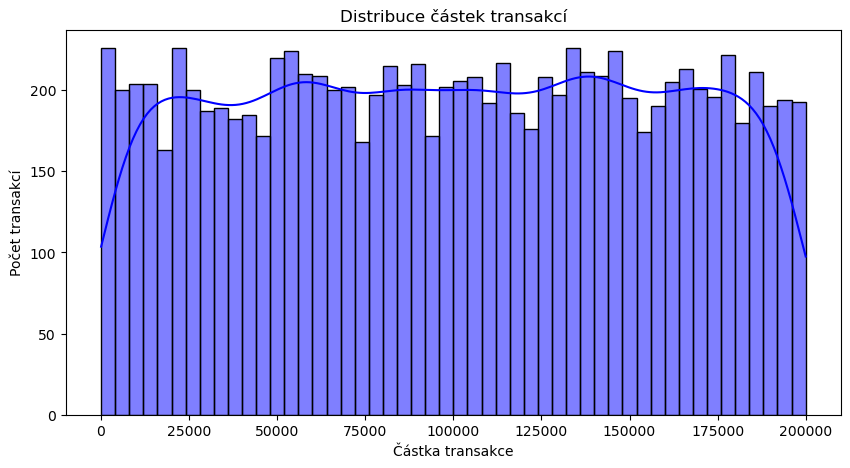

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribuce částek transakcí')
plt.xlabel('Částka transakce')
plt.ylabel('Počet transakcí')
plt.show()

Počet transakcí za den

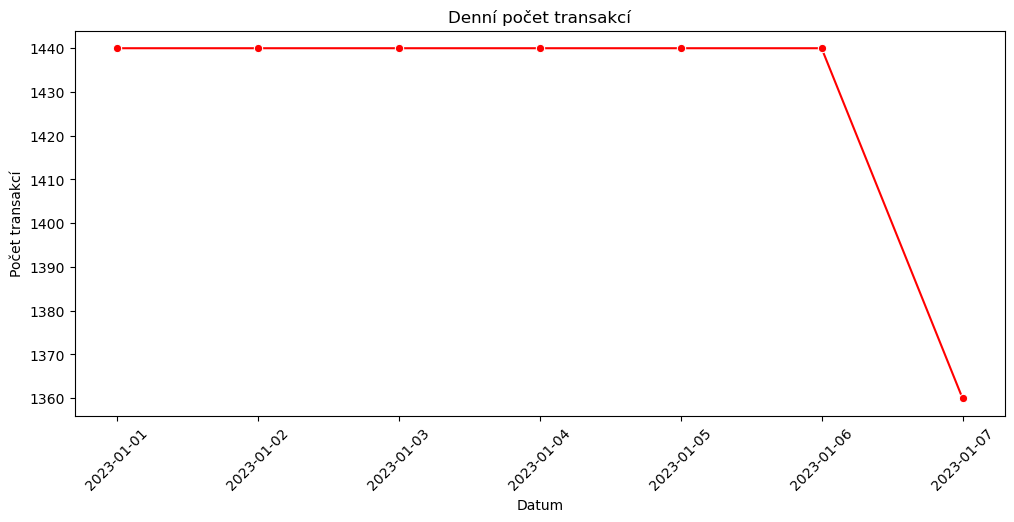

In [69]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
daily_transactions = df.groupby(df['Transaction_Date'].dt.date).size().reset_index(name='Transaction_Count')

plt.figure(figsize=(12,5))
sns.lineplot(x=daily_transactions['Transaction_Date'], y=daily_transactions['Transaction_Count'], marker='o', color='red')
plt.title('Denní počet transakcí')
plt.xlabel('Datum')
plt.ylabel('Počet transakcí')
plt.xticks(rotation=45)
plt.show()

Počet transakcí na zákazníka za měsíc

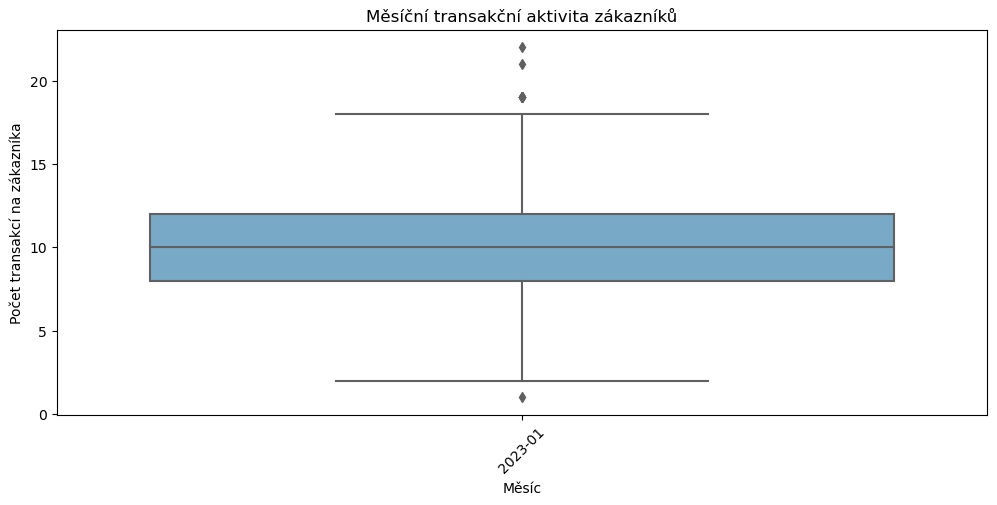

In [72]:
df['Month'] = df['Transaction_Date'].dt.to_period('M')
monthly_transactions = df.groupby(['Customer_ID', 'Month']).size().reset_index(name='Transaction_Count')

plt.figure(figsize=(12,5))
sns.boxplot(x=monthly_transactions['Month'].astype(str), y=monthly_transactions['Transaction_Count'], palette='Blues')
plt.title('Měsíční transakční aktivita zákazníků')
plt.xlabel('Měsíc')
plt.ylabel('Počet transakcí na zákazníka')
plt.xticks(rotation=45)
plt.show()


Nejaktivnější zákazníci (Top 10 podle frekvence transakcí)

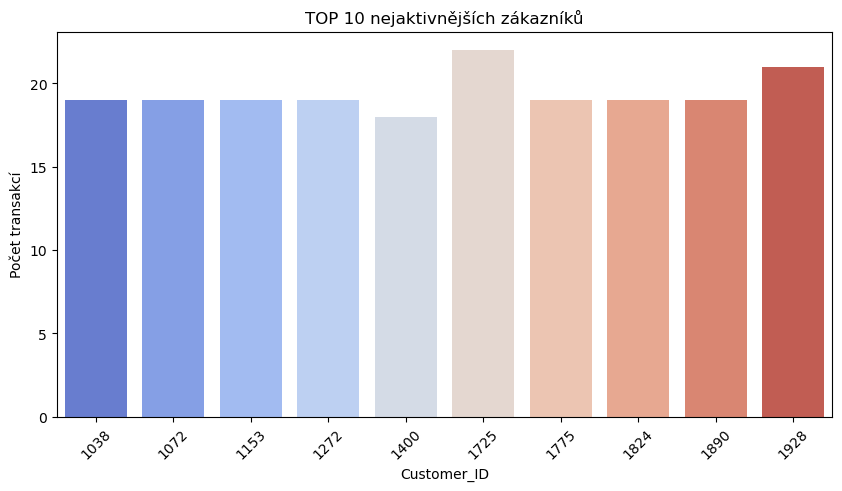

In [76]:
top_customers = df.groupby('Customer_ID').size().reset_index(name='Transaction_Count')
top_customers = top_customers.sort_values(by='Transaction_Count', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers['Customer_ID'], y=top_customers['Transaction_Count'], palette='coolwarm')
plt.title('TOP 10 nejaktivnějších zákazníků')
plt.xlabel('Customer_ID')
plt.ylabel('Počet transakcí')
plt.xticks(rotation=45)
plt.show()


Analýza transakcí s označením 'Fraud_Fleg'

In [81]:
fraud_counts = df['Fraud_Flag'].value_counts()
print(fraud_counts)

Fraud_Flag
1    5025
0    4975
Name: count, dtype: int64


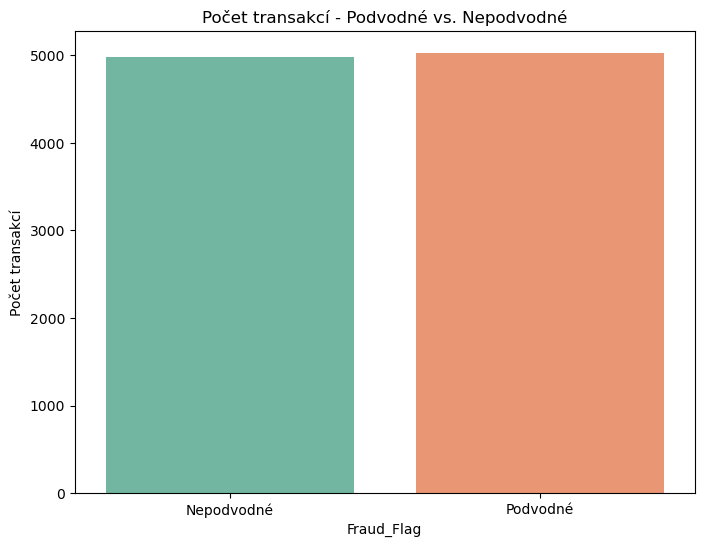

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(x='Fraud_Flag', data=df, palette='Set2')
plt.title('Počet transakcí - Podvodné vs. Nepodvodné')
plt.xlabel('Fraud_Flag')
plt.ylabel('Počet transakcí')
plt.xticks([0, 1], ['Nepodvodné', 'Podvodné'])
plt.show()

Porovnání průměrné částky mezi podvodnými a neepodvodnými transakcemi

In [88]:
fraud_amounts = df.groupby('Fraud_Flag')['Amount'].mean()
print(fraud_amounts)

Fraud_Flag
0     49932.336116
1    149724.946692
Name: Amount, dtype: float64


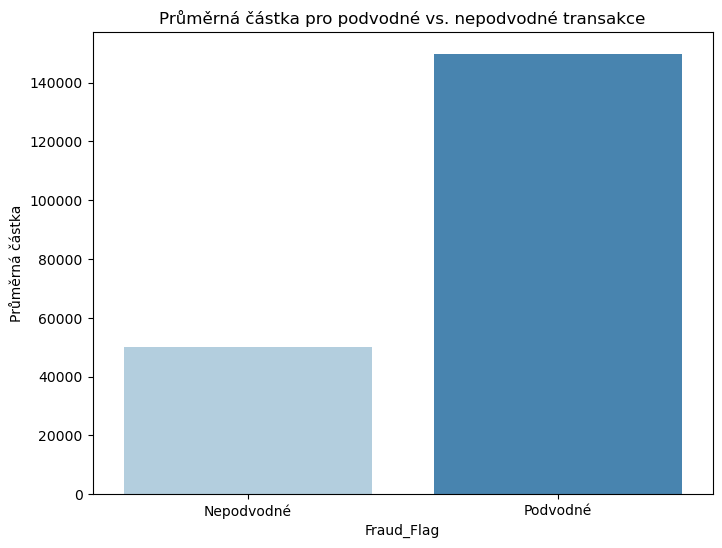

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x=fraud_amounts.index, y=fraud_amounts.values, palette='Blues')
plt.title('Průměrná částka pro podvodné vs. nepodvodné transakce')
plt.xlabel('Fraud_Flag')
plt.ylabel('Průměrná částka')
plt.xticks([0, 1], ['Nepodvodné', 'Podvodné'])
plt.show()

Vztah mezi množstvím a částkou pro podvodné vs. nepodvodné transakce

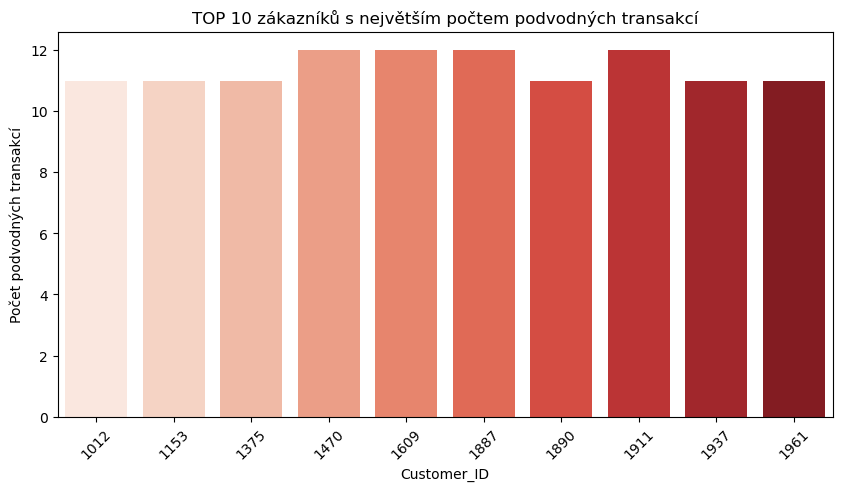

In [103]:
fraud_customers = df[df['Fraud_Flag'] == 1].groupby('Customer_ID').size().reset_index(name='Fraud_Count')
fraud_customers = fraud_customers.sort_values(by='Fraud_Count', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_customers['Customer_ID'], y=fraud_customers['Fraud_Count'], palette='Reds')
plt.title('TOP 10 zákazníků s největším počtem podvodných transakcí')
plt.xlabel('Customer_ID')
plt.ylabel('Počet podvodných transakcí')
plt.xticks(rotation=45)
plt.show()


Předpovědět podezřelé transakce na základě vzorů.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [114]:

# Konverze datumu
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Vytvoření nových časových prvků
df['Transaction_Hour'] = df['Transaction_Date'].dt.hour
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Month'] = df['Transaction_Date'].dt.month

# Výběr relevantních sloupců
features = ['Amount', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month']
X = df[features]
y = df['Fraud_Flag']

In [116]:
# Rozdělení na trénovací (80%) a testovací (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizace dat (normalizace hodnot)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [118]:
# Inicializace modelu
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Trénink modelu
model.fit(X_train, y_train)

# Predikce na testovacích datech
y_pred = model.predict(X_test)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       995
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



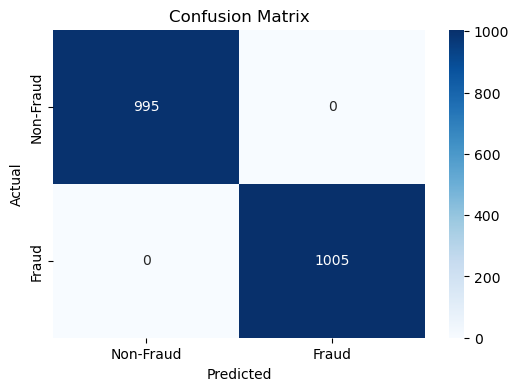

In [120]:
# Výsledky modelu
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matice záměn
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [128]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages("all_graphs.pdf")

# 📌 První graf
plt.figure(figsize=(10, 5))
df_fraud = df[df['Fraud_Flag'] == 1].groupby('Transaction_Date').count()
plt.plot(df_fraud.index, df_fraud['Fraud_Flag'], marker='o', color='red')
plt.title("Trend podvodných transakcí")
plt.xlabel("Datum")
plt.ylabel("Počet podvodů")
pdf.savefig()
plt.close()

# 📌 Druhý graf
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribuce částek transakcí")
plt.xlabel("Částka")
plt.ylabel("Počet transakcí")
pdf.savefig()
plt.close()

pdf.close()
